In [ ]:
import pandas as pd
import numpy as np
import time
import os
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr, bootstrap
import statsmodels.api as sm
import itertools
import random
from sympy.combinatorics import GrayCode
from multiprocessing import Process, Pool
from joblib import Parallel, delayed
import tqdm

In [ ]:
random.seed(42)

In [ ]:
pip install bootstrap-stat

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#pip install --upgrade scipy

In [ ]:
from bootstrap_stat import bootstrap_stat as bp
from bootstrap_stat import datasets as d

In [ ]:
df = d.law_data()
df

,LSAT,GPA
0,576,3.39
1,635,3.30
2,558,2.81
3,578,3.03
4,666,3.44
5,580,3.07
6,555,3.00
7,661,3.43
8,651,3.36
9,605,3.13


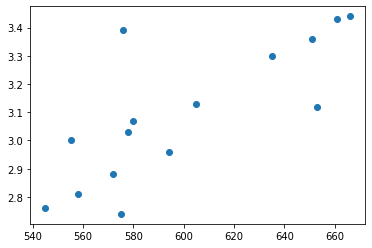

In [ ]:
plt.scatter(df['LSAT'], df['GPA'])

#Gray Code

#Remove outliers (1,11), check correlation 

0.776374491289407
0.931554171573079


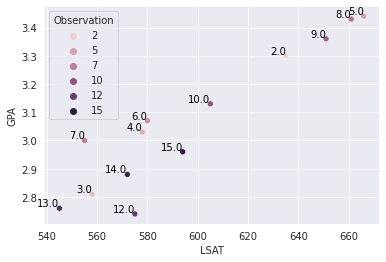

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

law2 = pd.DataFrame({'Observation': np.arange(1, len(df)+1), 'LSAT': df['LSAT'], 'GPA': df['GPA']})

# Exclude observations 1 and 11 from law2
law2 = law2.loc[(law2['Observation'] != 1) & (law2['Observation'] != 11)]

# Plot the data points with Observation label
sns.set_style('darkgrid')
sns.set_palette('bright')
g = sns.scatterplot(data=law2, x='LSAT', y='GPA', hue='Observation')
for index, row in law2.iterrows():
    g.text(row['LSAT'], row['GPA'], str(row['Observation']), color='black', ha='right', va='bottom', fontsize=10)

# Remove the Observation column from law2
law2 = law2.drop('Observation', axis=1)

# Calculate Pearson correlation coefficients for the original and modified data
print(np.corrcoef(df['LSAT'], df['GPA'])[0, 1])
print(np.corrcoef(law2['LSAT'], law2['GPA'])[0, 1])

In [ ]:
law2

,LSAT,GPA
1,635,3.30
2,558,2.81
3,578,3.03
4,666,3.44
5,580,3.07
6,555,3.00
7,661,3.43
8,651,3.36
9,605,3.13
11,575,2.74


In [ ]:
import numpy as np
import time

# Generating gray codes
ptm = time.process_time()
n = len(law2['LSAT'])
i = 1
total = np.math.comb(2*n - 1, n - 1)
gray_codes = np.zeros((total, n))

r = np.zeros(n)
r[0] = n
t = n
h = 0
gray_codes[i-1,:] = r
i += 1

while r[n-1] != n:
    if t != 1:
        h = 0
    h += 1
    t = r[h-1]
    r[h-1] = 0
    r[0] = t - 1
    r[h] += 1
    gray_codes[i-1,:] = r
    i += 1
    
print(time.process_time() - ptm)

11.158362276999998


#Gray code vector representation

/usr/local/lib/python3.9/dist-packages/numpy/lib/function_base.py:2829: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.9/dist-packages/numpy/lib/function_base.py:2830: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


Iteration: 187333
Mean correlation: 0.9743515987561168
Standard deviation of correlation: 0.03646499843938909
Mean weight: 0.9973523084560648
Standard deviation of weight: 0.9596957751671101


/usr/local/lib/python3.9/dist-packages/numpy/lib/function_base.py:2829: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.9/dist-packages/numpy/lib/function_base.py:2830: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


Iteration: 373699
Mean correlation: 0.9308831446453909
Standard deviation of correlation: 0.06787580488550897
Mean weight: 0.999132992060455
Standard deviation of weight: 0.9605221153051418


/usr/local/lib/python3.9/dist-packages/numpy/lib/function_base.py:2829: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.9/dist-packages/numpy/lib/function_base.py:2830: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


Iteration: 560836
Mean correlation: 0.8950341630860601
Standard deviation of correlation: 0.11238521195066814
Mean weight: 0.9990924263064426
Standard deviation of weight: 0.9596396819065466
Iteration: 747736
Mean correlation: 0.900467898846002
Standard deviation of correlation: 0.10184251573993024
Mean weight: 0.9997378753998738
Standard deviation of weight: 0.9604641023369136
Iteration: 934865
Mean correlation: 0.9018821228512962
Standard deviation of correlation: 0.09727307737295182
Mean weight: 0.9992073721874282
Standard deviation of weight: 0.9600840262042443
Iteration: 1122535
Mean correlation: 0.9061499292722306
Standard deviation of correlation: 0.09239524371338909
Mean weight: 0.9994672771895754
Standard deviation of weight: 0.9603077665288922


/usr/local/lib/python3.9/dist-packages/numpy/lib/function_base.py:2829: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.9/dist-packages/numpy/lib/function_base.py:2830: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


Iteration: 1310671
Mean correlation: 0.9118357970092749
Standard deviation of correlation: 0.08896953626052058
Mean weight: 0.9997856059987594
Standard deviation of weight: 0.9606421669633912
Iteration: 1498875
Mean correlation: 0.9065984388399033
Standard deviation of correlation: 0.09042902027204414
Mean weight: 1.000567091985656
Standard deviation of weight: 0.9608837000881163
Iteration: 1686030
Mean correlation: 0.9068166714073426
Standard deviation of correlation: 0.087906878487095
Mean weight: 1.0004383077406689
Standard deviation of weight: 0.9608174717951659
Iteration: 1870921
Mean correlation: 0.9099496690062177
Standard deviation of correlation: 0.08608922430222955
Mean weight: 1.0008097616093892
Standard deviation of weight: 0.9612794269724336
Iteration: 2057522
Mean correlation: 0.9079637677648668
Standard deviation of correlation: 0.08534246701912164
Mean weight: 1.0005953763799367
Standard deviation of weight: 0.9612420941315812
Iteration: 2245696
Mean correlation: 0.9088

/usr/local/lib/python3.9/dist-packages/numpy/lib/function_base.py:2829: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]


Iteration: 2596283
Mean correlation: 0.9113330263658529
Standard deviation of correlation: 0.08367146788461825
Mean weight: 1.0003092883171827
Standard deviation of weight: 0.9610057873322366
Iteration: 2769669
Mean correlation: 0.9079191646046005
Standard deviation of correlation: 0.08435355049828994
Mean weight: 1.0004072688830326
Standard deviation of weight: 0.9610496025111864
Iteration: 2945309
Mean correlation: 0.9067557554241337
Standard deviation of correlation: 0.08529630763942109
Mean weight: 1.000207788045329
Standard deviation of weight: 0.9609401417314917
Iteration: 3116347
Mean correlation: 0.907296958968232
Standard deviation of correlation: 0.0844015518353665
Mean weight: 1.000176167801596
Standard deviation of weight: 0.9608278543485481
Iteration: 3276345
Mean correlation: 0.9076620800429351
Standard deviation of correlation: 0.08378210958163483
Mean weight: 1.0002017492052881
Standard deviation of weight: 0.960819497147116
Iteration: 3436674
Mean correlation: 0.906804

/usr/local/lib/python3.9/dist-packages/numpy/lib/function_base.py:2829: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.9/dist-packages/numpy/lib/function_base.py:2830: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


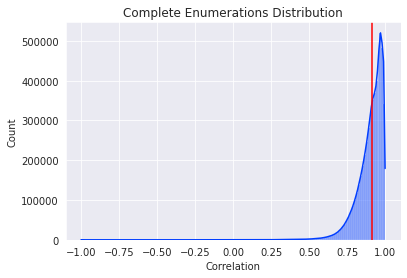

In [ ]:
import time
from scipy.special import binom
n = law2.shape[0]
total = int(binom(2*n - 1, n - 1))
gray_codes = np.zeros((total, n))

r = np.zeros(n)
r[0] = n
t = n
h = 0
gray_codes[0, :] = r

i = 1
while r[n - 1] != n:
    if t != 1:
        h = 0
    h += 1
    t = r[h - 1]
    r[h - 1] = 0
    r[0] = t - 1
    r[h] += 1
    gray_codes[i, :] = r
    i += 1

# Complete Enumerations Simulation
enumData = np.zeros((total, 2))
start_time = time.time()
for i in range(total):
    index = gray_codes[i, :].astype(int)
    law_list = []
    for j in range(n):
        law_list.append(np.tile(law2.iloc[j, :], (index[j], 1)))
    newLaw = np.vstack(law_list)
    enumData[i, 0] = np.corrcoef(newLaw[:, 0], newLaw[:, 1])[0, 1]
    enumData[i, 1] = np.random.multinomial(index.sum(), np.ones(n) / n, size=1)[0][0]
    
    # Print statistical information every 5 minutes
    if time.time() - start_time > 300:
        start_time = time.time()
        df = pd.DataFrame(data=enumData[:i+1, :], columns=["cor", "weight"])
        print("Iteration:", i+1)
        print("Mean correlation:", np.mean(df["cor"]))
        print("Standard deviation of correlation:", np.std(df["cor"]))
        print("Mean weight:", np.mean(df["weight"]))
        print("Standard deviation of weight:", np.std(df["weight"]))
        print("=" * 30)
    
    # Output histogram every 10 minutes
    if time.time() - start_time > 600:
        start_time = time.time()
        df = pd.DataFrame(data=enumData[:i+1, :], columns=["cor", "weight"])
        sns.histplot(data=df, x="cor", binwidth=0.013, kde=True)
        plt.axvline(x=np.corrcoef(law2["LSAT"], law2["GPA"])[0, 1], color="red")
        plt.xlabel("Correlation")
        plt.ylabel("Count")
        plt.title("Complete Enumerations Distribution")
        plt.show()

# Final histogram
df = pd.DataFrame(data=enumData, columns=["cor", "weight"])
sns.histplot(data=df, x="cor", binwidth=0.013, kde=True)
plt.axvline(x=np.corrcoef(law2["LSAT"], law2["GPA"])[0, 1], color="red")
plt.xlabel("Correlation")
plt.ylabel("Count")
plt.title("Complete Enumerations Distribution")
plt.show()

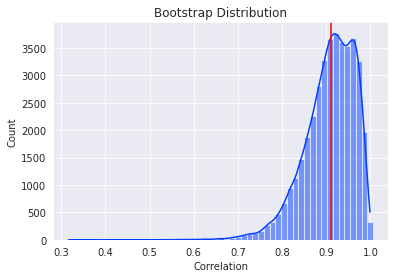

In [ ]:
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.special import binom

n = law2.shape[0]
total = int(binom(2*n - 1, n - 1))
gray_codes = np.zeros((total, n))

r = np.zeros(n)
r[0] = n
t = n
h = 0
gray_codes[0, :] = r

i = 1
while r[n - 1] != n:
    if t != 1:
        h = 0
    h += 1
    t = r[h - 1]
    r[h - 1] = 0
    r[0] = t - 1
    r[h] += 1
    gray_codes[i, :] = r
    i += 1

# Bootstrap Monte Carlo Simulation
B = 40000
mc_cors = np.zeros(B)

start_time = time.time()
for i in range(B):
    mc_samp = np.random.choice(n, size=n, replace=True)
    law_samp = law2.iloc[mc_samp, :]
    mc_cors[i] = np.corrcoef(law_samp["LSAT"], law_samp["GPA"])[0, 1]
    
    # Print statistical information every 5 minutes
    if time.time() - start_time > 300:
        start_time = time.time()
        df1 = pd.DataFrame(data=mc_cors[:i+1], columns=["cor"])
        print("Iteration:", i+1)
        print("Mean correlation:", np.mean(df1["cor"]))
        print("Standard deviation of correlation:", np.std(df1["cor"]))
        print("=" * 30)
    
    # Output histogram every 10 minutes
    if time.time() - start_time > 600:
        start_time = time.time()
        df1 = pd.DataFrame(data=mc_cors[:i+1], columns=["cor"])
        sns.histplot(data=df1, x="cor", binwidth=0.013, kde=True)
        plt.axvline(x=np.corrcoef(law2["LSAT"], law2["GPA"])[0, 1], color="red")
        plt.xlabel("Correlation")
        plt.ylabel("Count")
        plt.title("Bootstrap Distribution")
        plt.show()

# Final histogram
df1 = pd.DataFrame(data=mc_cors, columns=["cor"])
sns.histplot(data=df1, x="cor", binwidth=0.013, kde=True)
plt.axvline(x=np.corrcoef(law2["LSAT"], law2["GPA"])[0, 1], color="red")
plt.xlabel("Correlation")
plt.ylabel("Count")
plt.title("Bootstrap Distribution")
plt.show()

#Binary code representation.

The process is being used to check the the number of iterations produced in first 10 minutes. 

In [ ]:
import time
from scipy.special import binom

n = law2.shape[0]
total = int(binom(2*n - 1, n - 1))

# Complete Enumerations Simulation
enumData = np.zeros((total, 2))
start_time = time.time()

for i in range(total):
    index = np.zeros(n, dtype=int)
    j = i
    for k in range(n-1, -1, -1):
        try:
            index[k] = j // binom(k*2, k+1)
        except ValueError:
            index[k] = 0
        j = j % binom(k*2, k+1)

    law_list = []
    for j in range(n):
        law_list.append(np.tile(law2.iloc[j, :], (index[j], 1)))
    newLaw = np.vstack(law_list)

    enumData[i, 0] = np.corrcoef(newLaw[:, 0], newLaw[:, 1])[0, 1]
    enumData[i, 1] = np.random.multinomial(index.sum(), np.ones(n) / n, size=1)[0][0]

    # Print statistical information every 5 minutes
    if time.time() - start_time > 300:
        print("Time elapsed:", time.time() - start_time)
        start_time = time.time()
        df = pd.DataFrame(data=enumData[:i+1, :], columns=["cor", "weight"])
        print("Iteration:", i+1)
        print("Mean correlation:", np.mean(df["cor"]))
        print("Standard deviation of correlation:", np.std(df["cor"]))
        print("Mean weight:", np.mean(df["weight"]))
        print("Standard deviation of weight:", np.std(df["weight"]))
        print("=" * 30)

    # Output histogram every 10 minutes
    if time.time() - start_time > 600:
        print("Time elapsed:", time.time() - start_time)
        start_time = time.time()
        df = pd.DataFrame(data=enumData[:i+1, :], columns=["cor", "weight"])
        sns.histplot(data=df, x="cor", binwidth=0.013, kde=True)
        plt.axvline(x=np.corrcoef(law2["LSAT"], law2["GPA"])[0, 1], color="red")
        plt.xlabel("Correlation")
        plt.ylabel("Count")
        plt.title("Complete Enumerations Distribution")
        plt.show()

# Final histogram
df = pd.DataFrame(data=enumData, columns=["cor", "weight"])
sns.histplot(data=df, x="cor", binwidth=0.013, kde=True)
plt.axvline(x=np.corrcoef(law2["LSAT"], law2["GPA"])[0, 1], color="red")
plt.xlabel("Correlation")
plt.ylabel("Count")
plt.title("Complete Enumerations Distribution")
plt.show()

<ipython-input-14-0408ab3e0702>:16: RuntimeWarning: invalid value encountered in double_scalars
  index[k] = j // binom(k*2, k+1)
<ipython-input-14-0408ab3e0702>:19: RuntimeWarning: invalid value encountered in double_scalars
  j = j % binom(k*2, k+1)
/usr/local/lib/python3.9/dist-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/usr/local/lib/python3.9/dist-packages/numpy/core/_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
/usr/local/lib/python3.9/dist-packages/numpy/lib/function_base.py:2821: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.9/dist-packages/numpy/lib/function_base.py:2680: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.9/dist-packages/numpy/lib/function_base.py:2680: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, 

Time elapsed: 300.0004596710205
Iteration: 159096
Mean correlation: 0.8869544419100895
Standard deviation of correlation: 0.07758045843108664
Mean weight: 0.9219276411726254
Standard deviation of weight: 0.9465901866908828


<ipython-input-14-0408ab3e0702>:16: RuntimeWarning: invalid value encountered in double_scalars
  index[k] = j // binom(k*2, k+1)
<ipython-input-14-0408ab3e0702>:19: RuntimeWarning: invalid value encountered in double_scalars
  j = j % binom(k*2, k+1)
/usr/local/lib/python3.9/dist-packages/numpy/lib/function_base.py:2821: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.9/dist-packages/numpy/lib/function_base.py:2680: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.9/dist-packages/numpy/lib/function_base.py:2680: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


Time elapsed: 300.00000286102295
Iteration: 316736
Mean correlation: 0.8956610871605433
Standard deviation of correlation: 0.06903376264272187
Mean weight: 0.9597077692463124
Standard deviation of weight: 0.9658916353896406


<ipython-input-14-0408ab3e0702>:16: RuntimeWarning: invalid value encountered in double_scalars
  index[k] = j // binom(k*2, k+1)
<ipython-input-14-0408ab3e0702>:19: RuntimeWarning: invalid value encountered in double_scalars
  j = j % binom(k*2, k+1)
/usr/local/lib/python3.9/dist-packages/numpy/lib/function_base.py:2829: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]


KeyboardInterrupt: ignored

Binary code representation: 160000 iterations in 300 seconds (5 minutes)

Gray code representation: 190000 iterations in 300 seconds (5 minutes)

approximately 18% more iterations

Therefore, the number of iterations per second for **binary** code representation is:
x = 160000 / 300 = 533.33 iterations/second

And the number of iterations per second for **gray code** representation is:
y = 190000 / 300 = 633.33 iterations/second


time_binary = 40000 / 533.33 = 75 sec

time_gray = 40000 / 633.33 = 63 sec



1.19 times faster based on our assumptions (O(n))